In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
'''
scaler = StandardScaler():

StandardScaler is a class from sklearn.preprocessing that is used to standardize features (i.e., scale the data so that each feature has a mean of 0 and a standard deviation of 1).
Creating an instance of the StandardScaler class allows us to apply this standardization to the data.
X_scaled = scaler.fit_transform(X):

fit_transform(X) is a method that does two things:
fit(): It calculates the mean and standard deviation for each feature in the dataset X.
transform(): It then uses these values (mean and standard deviation) to standardize the data. Each feature is rescaled by subtracting the mean and dividing by the standard deviation.
X_scaled: This is the resulting dataset where each feature has been standardized. The values in X_scaled will have a mean of 0 and a standard deviation of 1.
Why standardize?
Standardization is important because many machine learning algorithms (e.g., clustering, SVM, K-means) perform better when the features are on a similar scale. Features with larger numerical ranges can dominate the learning process, leading to biased models. Standardizing the features helps ensure that each feature contributes equally to the model's performance.
'''

In [4]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)

In [ ]:
'''
Explanation:
agg_clustering = AgglomerativeClustering(n_clusters=3):

AgglomerativeClustering: This is a class from sklearn.cluster that implements agglomerative hierarchical clustering. In agglomerative clustering, each data point starts as its own cluster, and then the closest clusters are merged iteratively until the specified number of clusters is reached.
n_clusters=3: This parameter specifies the number of clusters the algorithm should form. Here, we are asking the algorithm to create 3 clusters from the input data.
agg_labels = agg_clustering.fit_predict(X_scaled):

fit_predict(X_scaled): This method does two things:
fit(): It learns the structure of the data by performing the agglomerative clustering algorithm on the scaled data X_scaled. It computes the distances between the data points and forms a hierarchy of clusters.
predict(): Once the algorithm has learned the clustering structure, it assigns a cluster label to each data point in X_scaled. The labels are the cluster IDs (from 0 to n_clusters-1), representing the cluster to which each data point belongs.
agg_labels: This variable contains the predicted cluster labels for each data point. It is an array of length n_samples, where each element is the cluster label assigned to the corresponding data point in X_scaled.
Summary:
AgglomerativeClustering is used to group the data points into a specific number of clusters (3 clusters in this case) based on their similarity.
fit_predict() applies the agglomerative clustering algorithm and assigns each data point to one of the 3 clusters, storing the results in agg_labels.


You said:
explain breifly about agglomerative clustering algorithm
ChatGPT said:
ChatGPT
Agglomerative Clustering Algorithm: A Brief Overview
Agglomerative Clustering is a type of hierarchical clustering algorithm. It follows a bottom-up approach, where each data point starts as its own individual cluster, and clusters are iteratively merged based on a measure of similarity (distance) between them.

Steps of the Agglomerative Clustering Algorithm:
Start with individual clusters:

Each data point is initially treated as its own cluster. If there are n data points, there will be n clusters at the start.
Compute the distance (similarity) between all clusters:

The algorithm computes the pairwise distance (or dissimilarity) between all clusters. Common distance measures include Euclidean distance or Manhattan distance. For hierarchical clustering, this is usually done by measuring the distance between points or between the centroids of clusters.
Merge the closest clusters:

The two clusters that are the most similar (i.e., the ones with the smallest distance between them) are merged together to form a new, larger cluster.
Repeat the process:

Steps 2 and 3 are repeated: after each merge, the distance between the new cluster and all other remaining clusters is recalculated, and the closest clusters are merged again.
Stop when the desired number of clusters is reached:

The process continues until the algorithm merges clusters down to a specified number (e.g., n_clusters), or until all data points are in one large cluster (i.e., a single cluster).
Key Concepts:
Linkage Methods: The method used to compute the distance between clusters influences the results of agglomerative clustering. Common linkage methods include:
Single linkage: Distance between the closest points of two clusters.
Complete linkage: Distance between the furthest points of two clusters.
Average linkage: Average distance between all pairs of points in two clusters.
Ward's linkage: Minimizes the total within-cluster variance (often preferred for numerical data).
Dendrogram: The result of agglomerative clustering can be visualized using a dendrogram, a tree-like diagram that shows the hierarchy of clusters and how they are merged at each step. The dendrogram helps to decide where to "cut" the tree to form a desired number of clusters.
Pros and Cons:
Pros:

No need to specify the number of clusters in advance (though it can be specified).
Works well for data with arbitrary shapes of clusters.
Provides a hierarchical structure, making it possible to inspect different levels of clustering.
Cons:

Computationally expensive for large datasets (time complexity is O(n²) in the worst case).
Sensitive to noisy data and outliers.
Example Use Cases:
Agglomerative Clustering is used in various fields, including:
Gene expression analysis in bioinformatics.
Document clustering in natural language processing.
Market segmentation in business and market
'''

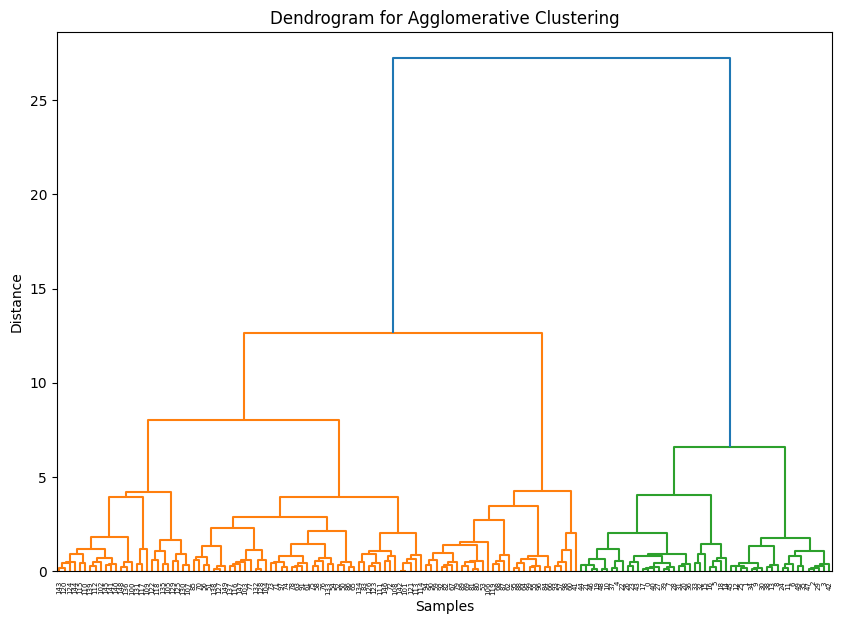

In [5]:
# Plot the dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
'''
The code generates a dendrogram to visualize the results of Agglomerative Clustering using hierarchical clustering.

Explanation:
linked = linkage(X_scaled, method='ward'):

linkage() computes the linkage matrix using the scaled data (X_scaled).
The method='ward' specifies that the Ward's linkage method should be used, which minimizes the variance within clusters (i.e., merges the clusters that result in the smallest increase in variance).
plt.figure(figsize=(10, 7)):

Sets the size of the figure to 10 by 7 inches for better visualization.
dendrogram(linked, ...):

dendrogram() plots the dendrogram based on the linkage matrix linked.
orientation='top': The dendrogram is drawn with the root at the top.
distance_sort='descending': The clusters are sorted by the distance between them, from largest to smallest.
show_leaf_counts=True: Displays the number of samples (data points) in each cluster at the leaves.
plt.title('Dendrogram for Agglomerative Clustering'):

Adds a title to the plot.
plt.xlabel('Samples') and plt.ylabel('Distance'):

Labels the x-axis and y-axis of the dendrogram.
X-axis: Represents the individual data points (samples).
Y-axis: Represents the distance between clusters at each merge step.
plt.show():

Displays the dendrogram plot.
Summary:
This code visualizes the hierarchical clustering process using a dendrogram. It shows how clusters are merged at each step, helping to determine the optimal number of clusters.


'''

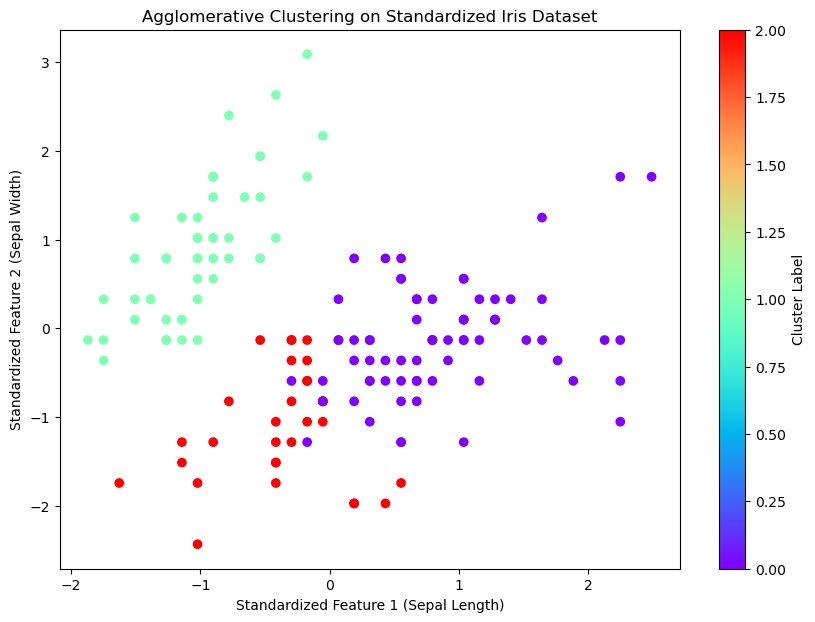

In [19]:
# Plot the clusters (using 2D projection for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='rainbow')
plt.title('Agglomerative Clustering on Standardized Iris Dataset')
plt.xlabel('Standardized Feature 1 (Sepal Length)')
plt.ylabel('Standardized Feature 2 (Sepal Width)')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
'''
AgglomerativeClustering is a class from sklearn.cluster used for hierarchical clustering. It performs agglomerative (bottom-up) clustering, where each data point starts as its own cluster and clusters are progressively merged based on a distance metric until the desired number of clusters is achieved.
4. from sklearn.preprocessing import StandardScaler:
StandardScaler is a class from sklearn.preprocessing that standardizes features by removing the mean and scaling to unit variance (standard deviation = 1). It is often used to scale the data before applying clustering algorithms to ensure features contribute equally to the distance calculations.
5. from scipy.cluster.hierarchy import dendrogram, linkage:
dendrogram: A function that generates and plots a dendrogram—a tree-like diagram that visualizes the hierarchy of clusters created by agglomerative clustering. The dendrogram shows how clusters are merged step-by-step.
linkage: A function from scipy.cluster.hierarchy that computes the linkage matrix. This matrix contains the hierarchical clustering distances between clusters, which are used by dendrogram to create the tree structure.
In summary:
matplotlib.pyplot: For plotting visualizations.
load_iris: To load the Iris dataset (a common dataset for clustering/classification).
AgglomerativeClustering: For performing agglomerative (hierarchical) clustering.
StandardScaler: For standardizing data before clustering.
dendrogram and linkage: For creating a dendrogram to visualize hierarchical clustering.
'''

In [ ]:
'''
plt.figure(figsize=(10, 7)):

Sets the figure size to 10 by 7 inches for better visualization.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='rainbow'):

plt.scatter() creates a scatter plot of the data points.
X_scaled[:, 0] and X_scaled[:, 1]: The first and second features of the scaled dataset (X_scaled) are used for the 2D projection (e.g., sepal length and sepal width from the Iris dataset).
c=agg_labels: Colors the points according to the cluster labels (agg_labels), showing which cluster each point belongs to.
cmap='rainbow': Uses a rainbow color map to assign different colors to different clusters.
plt.title('Agglomerative Clustering on Standardized Iris Dataset'):

Adds a title to the plot.
plt.xlabel('Standardized Feature 1 (Sepal Length)') and plt.ylabel('Standardized Feature 2 (Sepal Width)'):

Labels the x-axis and y-axis with the names of the standardized features (e.g., sepal length and sepal width).
plt.colorbar(label='Cluster Label'):

Adds a color bar to the plot, indicating which color corresponds to which cluster label.
plt.show():

Displays the scatter plot.
Summary:
This code creates a scatter plot of the 2D projection of the dataset, where each point is colored according to its assigned Agglomerative Clustering label, allowing you to visually inspect the clusters.
'''


